# House Price Estimation
    1 import data 

    2 look for any relation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os 
%matplotlib inline

In [2]:
cwd = os.getcwd() #currently working folder

In [8]:
df = pd.read_csv(cwd+'/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [54]:
df.info() #check any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


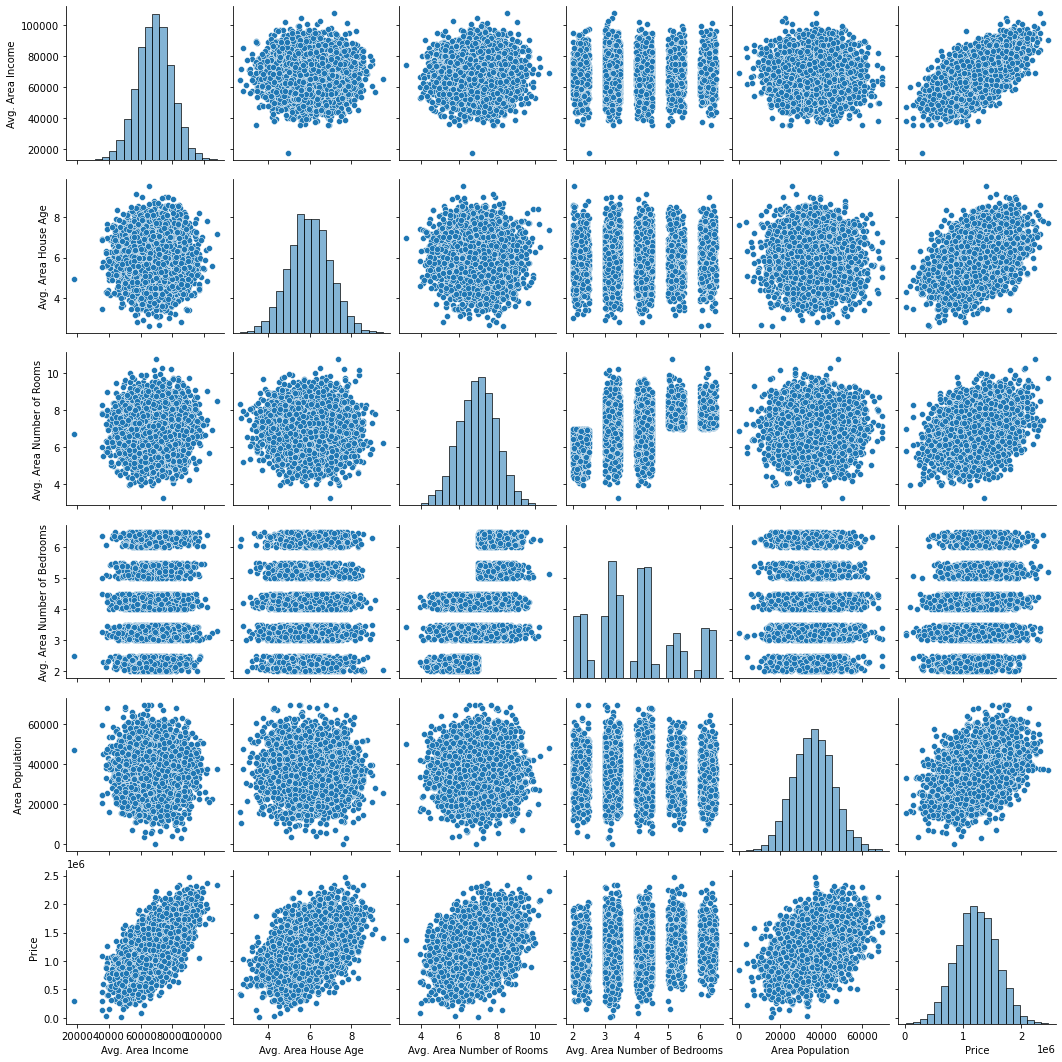

In [43]:
sns.pairplot(data= df, markers='o', diag_kws = {'alpha':0.55, 'bins':20})

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

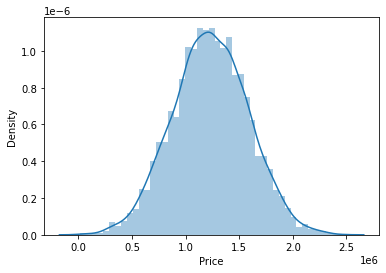

In [24]:
sns.distplot(df['Price'])

<AxesSubplot:>

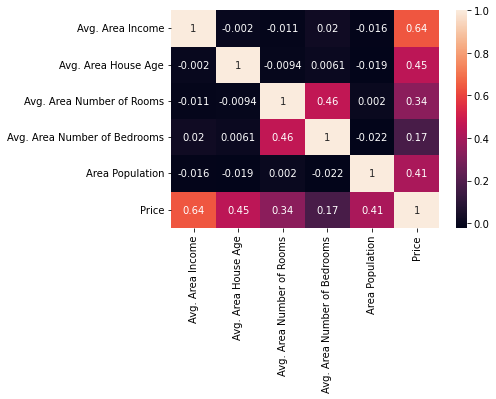

In [45]:
sns.heatmap(df.corr(),annot=True)

# After seen some relational data 
    now it's time to train my dragon(model) #joke




In [51]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [184]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df[['Price']]

In [186]:
from sklearn.model_selection import train_test_split 

In [185]:
X_train, x_test, y_train, y_test =  train_test_split (X,y, train_size=0.4, random_state=10)

# x_train.info() # ดูข้อมูล

# Training Model

In [177]:
from sklearn.linear_model import LinearRegression


In [178]:
lm = LinearRegression()

In [179]:
lm.fit(X_train,y_train)

LinearRegression()

In [115]:
coef_lm = pd.DataFrame(lm.coef_, X.columns,columns=['coefficient'])
coef_lm

,coefficient
Avg. Area Income,21.578049
Avg. Area House Age,165637.026941
Avg. Area Number of Rooms,120659.948816
Avg. Area Number of Bedrooms,1651.139054
Area Population,15.200744


In [180]:
print("R-squared : ",lm.score(X,y))
#R_sqr= pd.DataFrame(lm.score)


R-squared :  0.9179692242648438


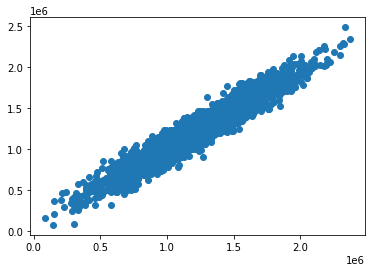

In [181]:
Prediction = lm.predict(x_test)

plt.scatter(y_test,Prediction)

Using another method statsmodel

In [170]:
import statsmodels.api as sm

model = sm.OLS(y,X).fit()

In [172]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.702e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:00:31   Log-Likelihood:                         -69078.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2372      0.269     38.106      0.000       9.711      10.764
Avg. Area House Age            5.13e+04   2960.917     17.324      0.000    4.55e+04    5.71e+04
Avg. Area Number of Rooms    -9614.4333   3262.997     -2.947      0.003    -1.6e+04   -3217.527
Avg. Area Number of Bedrooms  4082.3129   3132.333      1.303      0.193   -2058.435    1.02e+04
Area Population                  8.0918      0.327     24.745      0.000       7.451       8.733
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.490
Skew:                          -0.012   Prob(JB):                        0.783
Kurtosis:                       2.958   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
x_test. join(y_test)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
245,77300.031444,5.260975,6.936548,4.49,29499.040953,1.118048e+06
4493,69956.751883,4.982102,7.860718,3.17,35148.164910,1.326947e+06
4583,62654.359483,5.674788,6.850386,4.24,36718.512313,1.053485e+06
2242,38868.250311,6.965104,8.966906,4.22,25432.076773,7.590447e+05
3407,66629.254556,7.593559,7.073691,4.48,37261.318278,1.381118e+06
...,...,...,...,...,...,...
646,66684.347272,5.553655,6.965764,2.04,37226.307150,1.168575e+06
3606,76637.583898,5.839368,6.620744,2.18,36236.514677,1.405060e+06
4731,79158.817883,6.047006,8.691407,5.44,31766.026483,1.628830e+06
2025,38139.919045,5.577267,6.348068,2.13,45899.738402,7.237501e+05


# Prediction

In [318]:
prediction = lm.predict(x_test)
y_predict = lm.predict(x_test.iloc[[0]]) #เลือกข้อมูลมาเซ็ทนึง ลองpredict ดู

In [310]:
print('Predict Price :',int(y_predict))
print('Actual Price :' ,int (np.array(y_test[0:1])))

Predict Price : 1195216
Actual Price : 1118047


# Error Checking

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

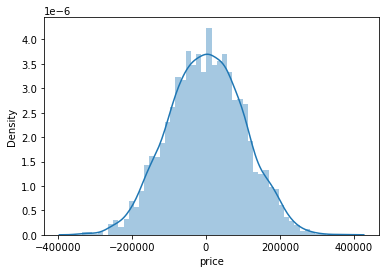

In [330]:
sns.distplot(y_test-prediction,bins= 50,axlabel='price')

In [333]:
from sklearn import metrics
print('MSE: Mean Square Error',metrics.mean_squared_error(y_test,prediction))

MSE: Mean Square Error 10279711863.828545
